## ***Data Science Engineering Methods***
## ***Assignment 2 – AutoML***

Question

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.

Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?



**Content**

The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data.

**Columns in our Dataset**

1. index
2. Date: The date of the observation
3. AveragePrice: The average price of a single avocado
4. Total Volume: Total number of avocados sold
5. 4046: Total number of avocados with PLU 4046 sold
6. 4225: Total number of avocados with PLU 4225 sold
7. 4770: Total number of avocados with PLU 4770 sold
8. Total Bags
9. Small Bags
10. Large Bags
11. XLarge Bags
12. type: conventional or organic
13. year: The year
14. region: The city or region of the observation



###Installing H2O

"pip install" is a common command in Python to add external code from the PyPI (Python Package Index) repository.

In [1]:
pip install --no-cache-dir flask --user

In [2]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=6fce0c08047f46b5fc8679f03d70be41424457a56abb4b305c3cd7318f0efd42
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


###Importing the required libraries

The Python "import" keyword brings in external modules or packages, while "from" is used to import specific objects or functions from a module.

In [3]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML

####Initialising the H2O cluster

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmbzgpe1q
  JVM stdout: /tmp/tmpmbzgpe1q/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmbzgpe1q/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_u0eonk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


We will be using a Kaggle dataset on **Avocado Prices** which has 11 Numerical columns and 3 Categorical columns. The dataset provides information about Avocado Prices with the help of variables such as total volume, total avocados sold with different PLU's, etc.

Hence our predictor variable here is the "Average Price" column.

In [5]:
#reading the dataset
import pandas as pd
pandas_df = pd.read_csv('https://raw.githubusercontent.com/Pritika-24/AutoML/main/avocado.csv')

In [6]:
#exploring the dataset columns
pandas_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
pandas_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
uniques = pandas_df['region'].unique()
print(uniques)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [10]:
uniques = pandas_df['type'].unique()
print(uniques)

['conventional' 'organic']


**We will be encoding the "region" and "type" columns for further use, as they can be a factor in determining Average Price.**

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['region', 'type']

# Apply label encoding to each column
for column in columns_to_encode:
    pandas_df[column] = label_encoder.fit_transform(pandas_df[column])

In [12]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int64  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 1.9+ MB


In [13]:
pandas_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [14]:
import numpy as np

#gives us the list of numerical columns and categorical columns
numerical_col = pandas_df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",numerical_col)

categorical_col = pandas_df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",categorical_col)

Numerical columns: 
 Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')
Categorical columns: 
 Index(['Date'], dtype='object')


As we have encoded the "region" and "type" column, we only have one cetgorical column now which is "Date".

Since the "Date" column does not really contribute in determining the Total Volume of the Avocados, we can go ahead and drop that column.

In [15]:
pandas_df = pandas_df.drop(columns=['Date'])

In [16]:
pandas_df = pandas_df.drop(columns=['Unnamed: 0'])

In [17]:
pandas_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [18]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'df' with your predictor variables
# Exclude the specific column you want to ignore
exclude_column = 'Unnamed: 0'
predictors = [col for col in pandas_df.columns if col != exclude_column]

# Create a DataFrame containing only the selected predictors
X = pandas_df[predictors]

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Format the VIF values to two decimal points
vif["VIF"] = ["{:.2f}".format(value) for value in vif["VIF"]]

# Print the VIF values
print(vif)

        Variable                 VIF
0   AveragePrice               21.93
1   Total Volume       5212424157.49
2           4046        694698638.40
3           4225        633297244.65
4           4770          4973370.24
5     Total Bags  250199979298360.88
6     Small Bags  142971416741920.50
7     Large Bags   15214863605981.41
8    XLarge Bags      78555723484.57
9           type                3.34
10          year               18.79
11        region                4.16


*It's clear that we have a multicollinearity issue in the dataset. Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other, and it can lead to unstable and unreliable coefficient estimates in regression analysis.*

Here are some observations from the VIF values:



1.   *Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, and Large Bags all
have extremely high VIF values. This indicates strong multicollinearity among these variables. In particular, Total Bags and Small Bags have extremely high VIF values, suggesting that they are highly correlated with many other variables in the dataset.*

2.  *AveragePrice and year have relatively high VIF values as well, although not as extreme as some of the other variables.*

3. *XLarge Bags has a VIF value that's still relatively high, but lower than some of the other variables.*

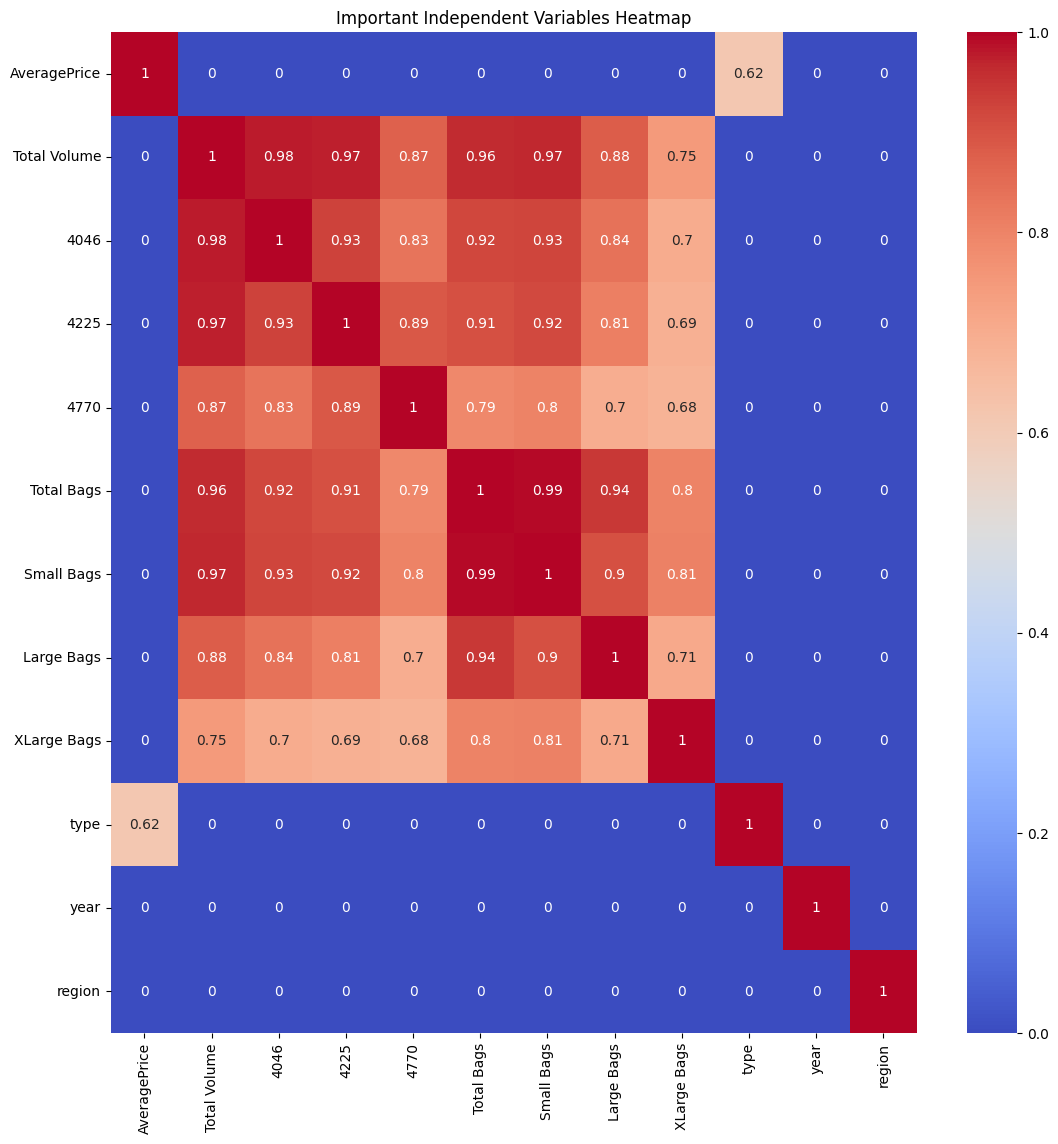

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = pandas_df.corr()

# Setting a threshold for correlation strength
correlation_threshold = 0.5

# Filtering out the important independent variables
important_variables = correlation_matrix[abs(correlation_matrix) >= correlation_threshold].fillna(0)

# Creating a heatmap to visualize the relationships
plt.figure(figsize=(13, 13))
sns.heatmap(important_variables, annot=True, cmap='coolwarm')
plt.title('Important Independent Variables Heatmap')
plt.show()

*As we can from the heatmap above, most of the Features are  correleted with the Total Volume column.*

*The correlation close to 1 indicates that it is strongly correlated, and the values closer to 0 are a weak correlation.*


##Execution of the H20 AutoML

###**Load the dataset as a H2O dataframe**

In [20]:
df = h2o.H2OFrame(pandas_df)  # Converted Dataframe to H2O data frame to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
df

AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1.33,64236.6,1036.74,54454.8,48.16,8696.87,8603.62,93.25,0,0,2015,0
1.35,54877,674.28,44638.8,58.33,9505.56,9408.07,97.49,0,0,2015,0
0.93,118220,794.7,109150,130.5,8145.35,8042.21,103.14,0,0,2015,0
1.08,78992.1,1132,71976.4,72.58,5811.16,5677.4,133.76,0,0,2015,0
1.28,51039.6,941.48,43838.4,75.78,6183.95,5986.26,197.69,0,0,2015,0
1.26,55979.8,1184.27,48068,43.61,6683.91,6556.47,127.44,0,0,2015,0
0.99,83453.8,1368.92,73672.7,93.26,8318.86,8196.81,122.05,0,0,2015,0
0.98,109428,703.75,101815,80,6829.22,6266.85,562.37,0,0,2015,0
1.02,99811.4,1022.15,87315.6,85.34,11388.4,11104.5,283.83,0,0,2015,0
1.07,74338.8,842.4,64757.4,113,8625.92,8061.47,564.45,0,0,2015,0


H2O provides a sample dataset of 10 rows with summary statistics for numerical columns.

The following chunk gives the information about the dataset concerning the following:

- **type:** This indicates the data type of the column.

- **mean:** This is the average value (mean) for each numerical column.

- **maxs:** This indicates the maximum value for each numerical column. It represents the largest value present in that column.

- **sigma:** Sigma measures the degree of variation in data points for each numerical column. A higher standard deviation indicates greater dispersion from the mean.

- **zeros:** This is the count of zero values in each numerical column.

- **missing_mean:** This statistic provides the mean of non-missing values in numerical columns with missing or NA entries.

In [22]:
df.describe(chunk_summary=True)

Rows:18249
Cols:12

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
CBS           Binary                     1        8.33333             2.3 KB    0.320784
C1N           1-Byte Integers (w/o NAs)  1        8.33333             17.9 KB   2.49821
C1S           1-Byte Fractions           1        8.33333             17.9 KB   2.5004
C2S           2-Byte Fractions           1        8.33333             35.7 KB   4.98933
C4S           4-Byte Fractions           7        58.3333             499.6 KB  69.7705
C8D           64-bit Reals               1        8.33333             142.6 KB  19.9208

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  716.0 KB  18249             1                              12
mean             716.0 KB  18249             1                              12
min              716.0 KB  18249             1                              12
max              716.0 KB  18249             1                              12
stddev           0  B      0                 0                              0
total            716.0 KB  18249             1                              12

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
type,real,real,real,real,real,real,real,real,real,int,int,int
mins,0.44,84.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,0.0
mean,1.4059784097758745,850644.0130089371,293008.42453065893,295154.56835607614,22839.73599265713,239639.20205983927,182194.68669571093,54338.08814455601,3106.4265072058874,0.49991780371527206,2016.1478985149838,26.495643596909304
maxs,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.8,5719096.61,551693.65,1.0,2018.0,53.0
sigma,0.4026765554955525,3453545.3553994684,1264989.0817627835,1204120.4011350533,107464.06843537069,986242.3992164108,746178.5149617895,243965.96454740898,17692.89465191642,0.5000136931874184,0.9399384671420302,15.583787874697258
zeros,0,0,242,61,5497,15,159,2370,12048,9126,0,338
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015.0,0.0
2,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,0.0,2015.0,0.0


**Splitting the Dataset**

It is essential to divide the dataset into separate training and testing sets. Doing so plays a critical role in evaluating the model's performance.

In [23]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

**Training the AutoML model**

Below:

- **max_model:** It specifies the maximum number of individual models that AutoML will train during the search for the best model.
- **balance_classes:** When set to TRUE, AutoML adjusts the class distribution in the training data to be balanced.
- **seed:** The seed parameter allows you to set a random seed for reproducibility.

In [24]:
auto_ml = H2OAutoML(max_models =5, balance_classes=True, seed =1)

**Now we start the training process by specifying:**

- **training_frame:** The training_frame parameter is used to specify the H2O data frame that contains your training dataset.
- **y:** The y parameter specifies the response variable for ML model prediction. "Average Price" according to our dataset

**Understanding the Parameters after the training process:**

- **Mean Squared Error (MSE):** The Mean Squared Error (MSE) measures the average of the squared differences between predicted and actual values.

- **Root Mean Squared Error (RMSE):** The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models as it's a measure of how well the model can predict the actual values.

- **Mean Absolute Error (MAE):** The MAE is the average absolute difference between predicted and actual values, calculated by taking the average of their absolute differences.

- **Root Mean Squared Logarithmic Error (RMSLE):** RMSLE is a variation of RMSE used in regression models with a wide range of values. It calculates the square root of the average squared difference between the logarithms of predicted and actual values.

- **Mean Residual Deviance:** The Mean Residual Deviance measures the average difference between predicted and actual values, normalized by the degrees of freedom.

- **R-squared (R^2):** The R-squared is a statistical measure that indicates how well a model fits the data. It quantifies the proportion of the variance in the dependent variable that can be explained by the independent variables. 1 means the model accounts for all variability, and 0 means it does not account for any.

- **Null Degrees of Freedom:** The Null Degrees of Freedom equals the number of observations minus 1. It represents independent observations in the dataset based on the number of parameters in the model.

- **Residual Degrees of Freedom:** The Residual Degrees of Freedom in statistical modeling is the number of independent observations in the dataset that can vary after adjusting for the number of parameters involved in the model.

- **Null Deviance:** The Null Deviance is the deviance of the null model with no independent variables, representing the unexplained variance in the dependent variable.

- **Residual Deviance:** The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

- **Akaike Information Criterion (AIC):** The AIC measures a model's quality, factoring in its complexity. It's calculated by subtracting the logarithm of the model's likelihood from twice the number of parameters. Lower values indicate better quality.

In [25]:
auto_ml.train(training_frame = train, y = 'Total Volume')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


From the statistics above for the train and cross-validation data we can infer that:

**Train Data**

- The **MSE (Mean Squared Error)** of **1,879,580,915.19** shows there's a significant squared difference between the model's predicted values and the actual values for the training data, indicating possible outliers or scale issues.
- An **RMSE (Root Mean Squared Error)** of **43,354.13** suggests that, on average, the model’s predictions deviate from the actual values by a large margin on the training set.
- With an **MAE (Mean Absolute Error)** of approximately **12,305.44**, this reflects the average absolute difference between predicted and actual values, which is high but might be expected given the scale of the 'Total Volume' variable.
- The absence of an **RMSLE (Root Mean Squared Logarithmic Error)** implies that it wasn't calculated, possibly due to negative or zero values in the 'Total Volume' which cannot be log-transformed.
- The **R^2 (R-squared)** value of approximately **0.9998** indicates that the model can explain nearly all the variability of the response data around its mean. While impressive, it also raises concerns of overfitting.
- The large gap between **null deviance** and **residual deviance** indicates the model's success in capturing the variance as compared to a mean model. However, the absolute numbers are vast due to the scale of 'Total Volume'.
- An **AIC (Akaike Information Criterion)** of **242,923.80** is difficult to interpret without context but suggests a complex model with potentially too many parameters, which could again imply overfitting.

**Cross-Validation Data**

- The increased **MSE** of **34,652,761,048.63** on the cross-validation data set indicates the model does not perform as well on unseen data, suggesting a discrepancy in the model's ability to generalize.
- A **RMSE** of **186,152.52** on the cross-validation data set is significantly higher than the training data, reinforcing the idea that the model's performance drops on new data.
- The **MAE** of **27,622.06** is also higher in the cross-validation than in the training, pointing towards less accurate predictions for data not encountered during training.
- The **RMSLE** is not reported; similar reasons as for the training data could apply.
- An **R-squared** value of approximately **0.9969** on cross-validation is still quite high, which means the model is explaining a lot of the variance in the unseen data. However, the drop from the training R-squared suggests performance degradation on new data.
- The larger **residual deviance** seen in cross-validation as compared to training indicates that the model is less capable of explaining variance outside the training set.
- A higher **AIC** value on cross-validation data (approximately **397,771.08**) compared to training data suggests that when adjusted for the number of parameters and complexity, the model might not be as effective for cross-validation data.


### Assessment

After training is complete, the effectiveness of each model can be assessed through a ranking table created by H2O AutoML. This table orders the models according to their proficiency, measured by a chosen metric. Typically, for classification tasks, the models are arranged from the lowest to highest log loss, while for regression tasks, they are sorted by their RMSE, with the most accurate models appearing first.

In [26]:
lb = auto_ml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231103_20449,186153,3.46528e+10,27622.1,nan,3.46528e+10
StackedEnsemble_BestOfFamily_1_AutoML_1_20231103_20449,203382,4.13642e+10,31728.1,nan,4.13642e+10
XGBoost_2_AutoML_1_20231103_20449,207173,4.29208e+10,35058.5,nan,4.29208e+10
XGBoost_1_AutoML_1_20231103_20449,215897,4.66117e+10,34092.8,0.102957,4.66117e+10
DRF_1_AutoML_1_20231103_20449,235808,5.56055e+10,31633.8,0.128691,5.56055e+10
GBM_1_AutoML_1_20231103_20449,478844,2.29291e+11,61239.2,nan,2.29291e+11
GLM_1_AutoML_1_20231103_20449,3.36306e+06,1.13102e+13,1.15358e+06,3.26271,1.13102e+13


###Finding the best-performing model

In [27]:
best_model = auto_ml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231103_20449


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1879580915.188015
RMSE: 43354.13377277898
MAE: 12305.443861984715
RMSLE: NaN
Mean Residual Deviance: 1879580915.188015
R^2: 0.9998344741602938
Null degrees of freedom: 10040
Residual degrees of freed

This particular model boasts the **most favorable RMSE**, a common gauge for assessing the accuracy of predictions in regression analyses. Nevertheless, to ensure a comprehensive evaluation of its predictive capabilities, it is essential to consider additional performance metrics and employ cross-validation techniques to more reliably predict how the model will perform with new data.

###Evaluating the best model on a holdout test set using the same evaluation metrics shown above.

In [28]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 23779645670.004044
RMSE: 154206.5033323953
MAE: 26836.56168594133
RMSLE: NaN
Mean Residual Deviance: 23779645670.004044
R^2: 0.9983541681835152
Null degrees of freedom: 3574
Residual degrees of freedom: 3571
Null deviance: 5.168631091474237e+16
Residual deviance: 85012233270264.45
AIC: 95569.6530966618

 Each metric offers insight into different aspects of the model's predictive performance:

Certainly, I will provide an adjusted summary based on the new values you have provided for your model's performance:

Each metric offers insight into different aspects of the model's predictive performance:

- **MSE (Mean Squared Error):** At 23,779,645,670.004044, this value indicates that the average of the squares of the errors is quite high. This suggests that there are significant differences between the predicted and actual values.

- **RMSE (Root Mean Squared Error):** The RMSE value of 154,206.5033323953 is the square root of the MSE. It brings the error metric back to the same scale as the target variable, making it more interpretable. However, the value is quite large, which suggests that the model's predictions can be off by a substantial amount on average.

- **MAE (Mean Absolute Error):** With a MAE of 26,836.56168594133, this metric shows the average absolute difference between the predicted and actual values. This relatively high MAE indicates that the model’s average predictive accuracy may not be very precise.

- **RMSLE (Root Mean Squared Logarithmic Error):** The RMSLE is not available (NaN), which might indicate the presence of negative predictions or actual values, as logarithms of such numbers are undefined.

- **Mean Residual Deviance:** This is the same as the MSE and is equally high at 23,779,645,670.004044, suggesting that on average, the residuals have a high variance.

- **R^2 (R-squared or Coefficient of Determination):** An R-squared value of 0.9983541681835152 indicates that approximately 99.84% of the variance in the dependent variable is predictable from the independent variables. Despite the high MSE and MAE, this suggests the model fits the data very closely in terms of the proportion of explained variance.

- **Null Deviance and Residual Deviance:** The considerable reduction from null deviance (approximately 5.17e+16) to residual deviance (85,012,233,270,264.45) indicates that the model is a significantly better fit than a simple mean model. This shows that, despite the high absolute error metrics, the model has improved the predictability from a null model.

- **AIC (Akaike Information Criterion):** The AIC value of 95,569.6530966618 suggests the model is complex. In contrast to the previous example, the positive value here does not directly imply a better or worse fit but should be used to compare to alternative models on the same data.

In summary, the metrics collectively indicate that while the model has a high R-squared value, suggesting a strong fit, the large values for MSE, RMSE, and MAE highlight that the model's predictions can be off by a significant amount on individual predictions. The absence of RMSLE prevents assessment of the model's performance on a logarithmic scale. The large scale of the target variable may be influencing the high error values, so it's important to consider these metrics in context. The model shows a marked improvement over a naive mean model but may benefit from further tuning to reduce prediction errors.

### **H2O AutoML provides global model explainability insights including variable importance, partial dependence plot, SHAP values, and model correlation.**

In [29]:
model_index = 0
glm_index = 0
glm_model = ""
auto_ml_leaderboard_df = auto_ml.leaderboard.as_data_frame()
models_dict = {}
for m in auto_ml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in auto_ml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_1_AutoML_1_20231103_20449': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231103_20449': 1,
 'XGBoost_2_AutoML_1_20231103_20449': 2,
 'GLM_1_AutoML_1_20231103_20449': 6}

In [30]:
print(model_index)
best_model = h2o.get_model(auto_ml.leaderboard[model_index, "model_id"])

2


In [31]:
best_model.algo

'xgboost'

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


<ipython-input-32-a0f01d27643e>:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

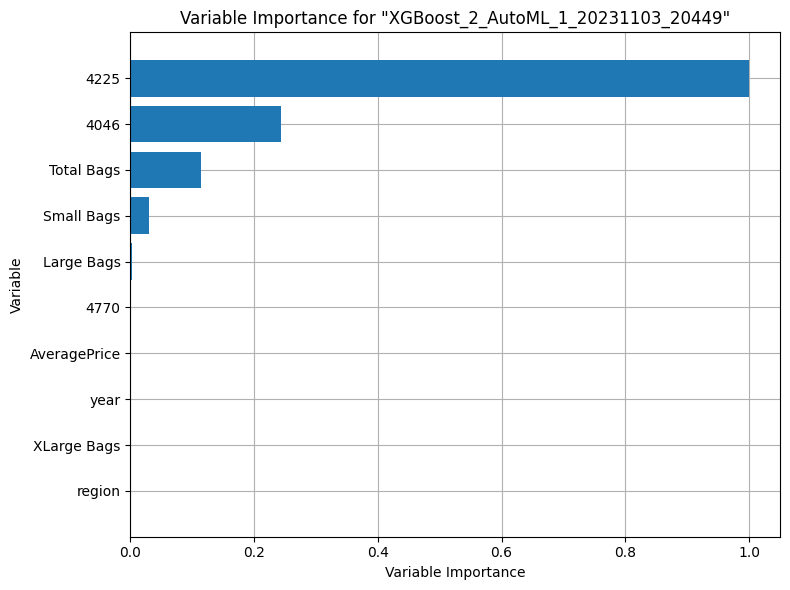

In [33]:
explain_model = auto_ml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model

We can Interpret that

"4225" is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)

"4046" is 0.22 (being the second most important variable)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

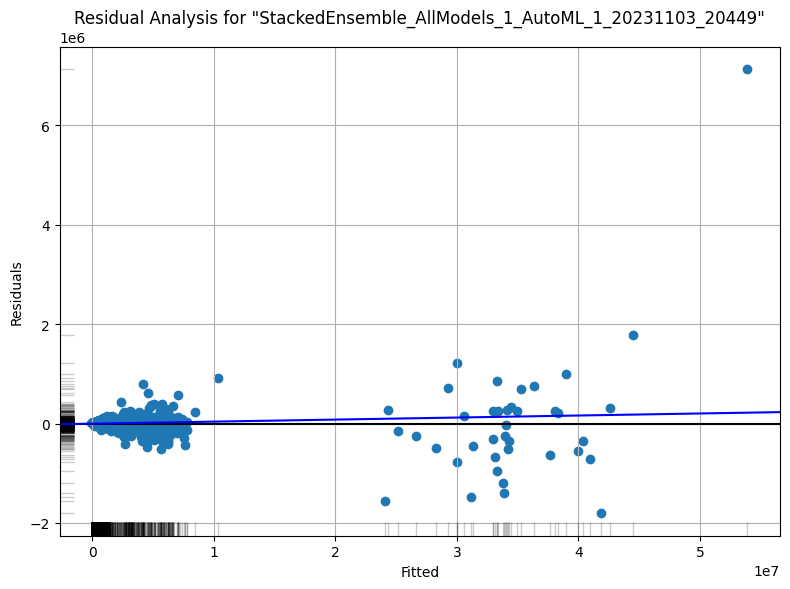

In [34]:
explain_model = auto_ml.explain(frame = test, figsize = (8,6),include_explanations=['residual_analysis'])

The presence of a **dispersed array of points around the zero line** suggests that the **model is performing well**.

6


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-35-cb813f47c4df>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


Model Name: GLM_1_AutoML_1_20231103_20449


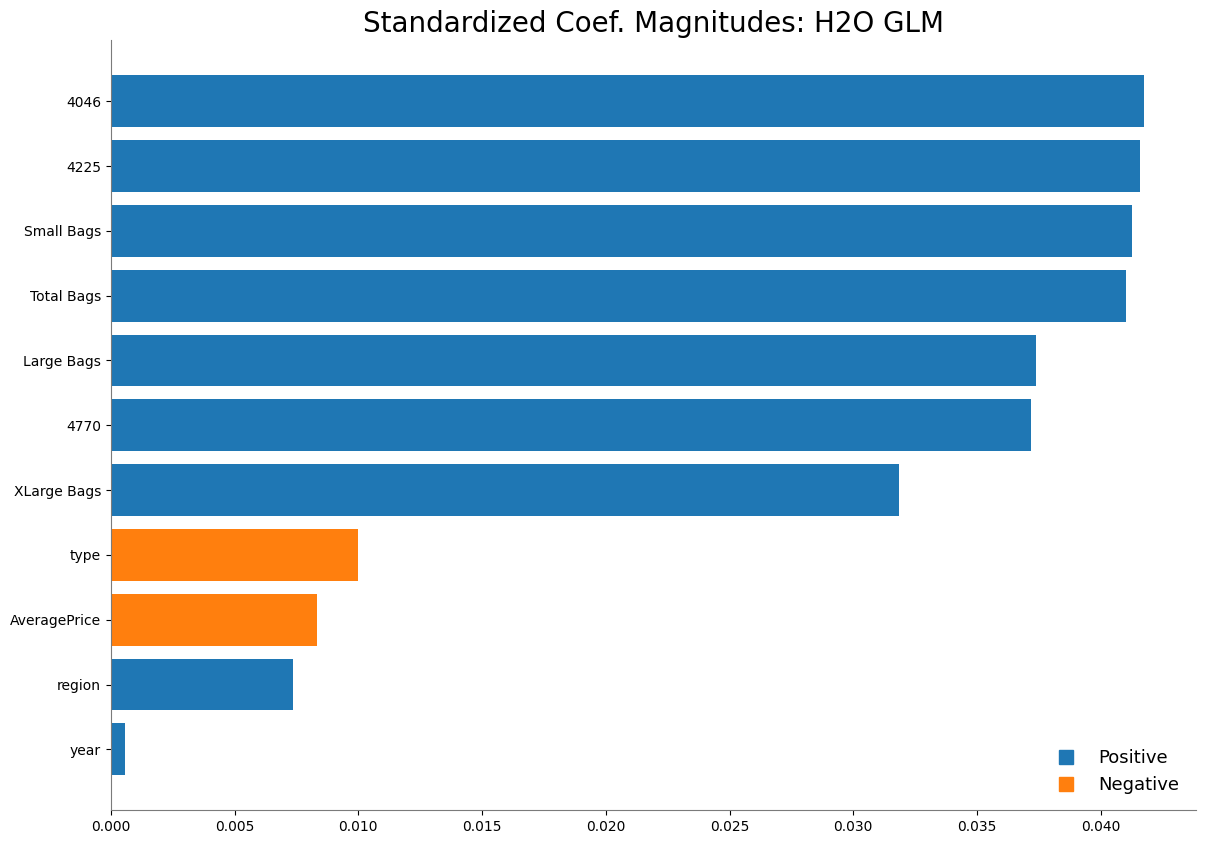

In [35]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(auto_ml.leaderboard[glm_index, "model_id"])
    print("Model Name:", glm_model.model_id)
    glm_model.std_coef_plot()


The magnitudes of standardized coefficients reflect the comparative significance of each predictor within the model, adjusted for the scale of the respective variable.

A greater magnitude value for "4046" signifies a more pronounced influence on the dependent variable, which is, "Total Volume".

##**1. Is the relationship significant?**

From the below values, it's evident that the R^2 value is 0.9983, suggesting a very strong explanatory power of the features in the model. This indicates a high degree of association between the predictors and the response variable. The data supports the idea that there's a significant relationship between the variables under consideration.

In [38]:
best_model = auto_ml.get_best_model()

In [40]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

df = df.as_data_frame()

model = sm.OLS(df['Total Volume'], df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Total Volume   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.055e+13
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                        0.00
Time:                        02:11:37   Log-Likelihood:                         -97027.
No. Observations:               18249   AIC:                                  1.941e+05
Df Residuals:                   18240   BIC:                                  1.941e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
AveragePrice     2.6934      0.931      2.894      0.004       0.869       4.518
4046             1.0000   9.14e-07   1.09e+06      0.000       1.000       1.000
4225             1.0000   1.11e-06   9.03e+05      0.000       1.000       1.000
4770             1.0000   7.86e-06   1.27e+05      0.000       1.000       1.000
Total Bags       0.9691      5.695      0.170      0.865     -10.194      12.132
Small Bags       0.0309      5.695      0.005      0.996     -11.132      11.194
Large Bags       0.0309      5.695      0.005      0.996     -11.132      11.194
XLarge Bags      0.0307      5.695      0.005      0.996     -11.133      11.194
year            -0.0009      0.001     -1.335      0.182      -0.002       0.000
==============================================================================
Omnibus:                    60856.481   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      14694906146.534
Skew:                          58.938   Prob(JB):                         0.00
Kurtosis:                    4397.539   Cond. No.                     6.73e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 23779645670.004044
RMSE: 154206.5033323953
MAE: 26836.56168594133
RMSLE: NaN
Mean Residual Deviance: 23779645670.004044
R^2: 0.9983541681835152
Null degrees of freedom: 3574
Residual degrees of freedom: 3571
Null deviance: 5.168631091474237e+16
Residual deviance: 85012233270264.45
AIC: 95569.6530966618

##**2. Are any model assumptions violated?**


From the scatterplot below, we can observe a pattern suggesting heteroscedasticity, with data points clustering more closely in the middle and dispersing towards the extremes. This inconsistency in the spread of residuals can impact the reliability of regression predictions.

Furthermore, the probability plot reveals that while the data points closely follow the theoretical normal line on the left side, there is a significant deviation on the right side. This indicates a potential violation of the normality assumption in the upper quantiles of the data.

###Combined Insights:
1. The model seems to be struggling with assumptions of both homoscedasticity and normality. The heteroscedastic nature observed in the scatterplot and the deviation from normality in the probability plot can compound and lead to unreliable regression predictions and skewed statistical analyses.


###Actions to Consider:

1. **Transformation**: Applying transformations, such as logging, to the dependent variable can help in addressing both heteroscedasticity and deviations from normality.
2. **Residual Analysis**: Further inspection of residuals can offer deeper insights into the nature and potential sources of these deviations.
3. **Weighted Regression**: This can be used to address heteroscedasticity by giving different weights to different observations.
4. **Non-Parametric Tests**: If data doesn't fit the normal distribution, consider non-parametric methods that don't rely on this assumption.
5. **Outlier Analysis**: Investigate the dataset for outliers, especially where deviations are most noticeable, as they can influence both the distribution and variance of residuals.


**So to answer the question, yes one of the model assumptions, specifically homoscedasticity and normality, appear to be violated.**


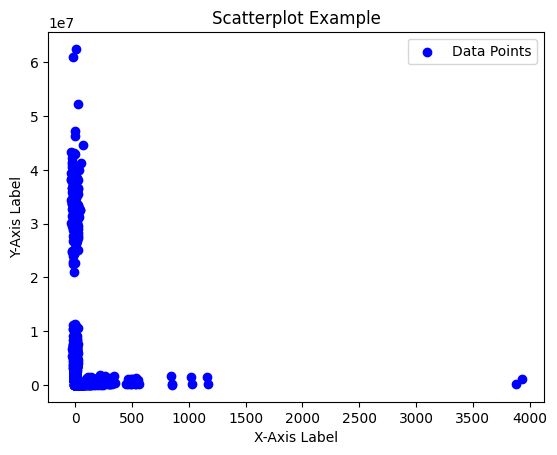

In [42]:
residuals = model.resid
y = df['Total Volume']

plt.scatter(residuals, y, label='Data Points', color='blue', marker='o')

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Scatterplot Example')

# Add a legend (if necessary)
plt.legend()

# Show the plot
plt.show()

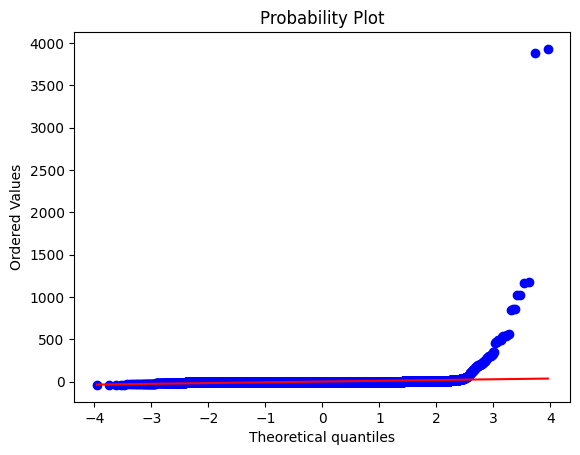

In [43]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Total Volume', ylabel='Count'>

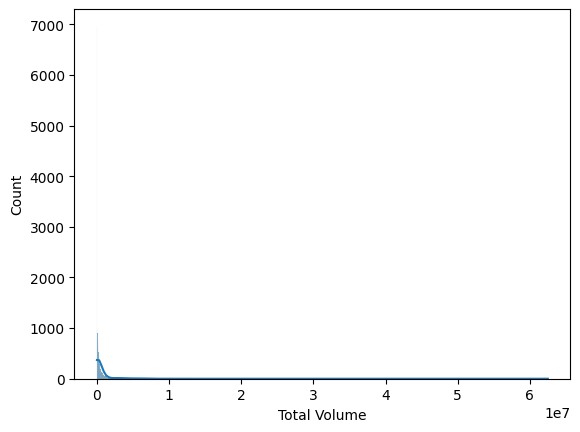

In [44]:
sns.histplot(df['Total Volume'], kde = True)

In [45]:
# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)

# Output the test statistic
print("Durbin-Watson Statistic:", durbin_watson_statistic)

Durbin-Watson Statistic: 1.483779193369251


Linear regression assumes that there is no or little auto correlation among the residuals. The Durbin-Watson test is a commonly used method to check for this. Typically, a Durbin-Watson statistic value between 1.5 and 2.5 suggests that there is no significant autocorrelation in the residuals.

The above Durbin-Watson statistic (d) value of 1.4865 is closer to the lower bound of the acceptable range. While it is within the acceptable range, it leans towards the possibility of some slight positive autocorrelation present in the residuals of our regression model. However, it doesn't strongly indicate a violation, but it would be prudent to keep this in consideration when interpreting the model's results.

<ipython-input-46-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


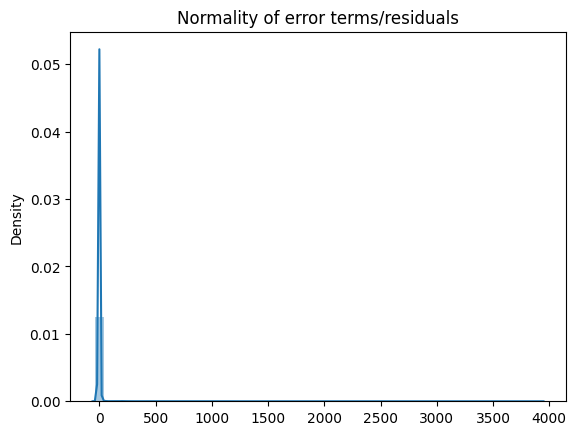

In [46]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Multicollinearity occurs when the independent variables are too highly correlated with each other.

Here's what we can infer from the below heatmap:

**High Multicollinearity:** Several variables have high positive correlations (values close to 1) with each other. For instance:
4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags are highly correlated with Total Volume. This suggests they all contribute significantly to the Total Volume variable.

Small Bags has high correlations with Total Bags, Large Bags, and 4046, among others. Similarly, other bag types show strong correlations with each other.

**Inverse Relationship with AveragePrice:** Most variables have negative correlations with AveragePrice, suggesting that as these variables increase, the AveragePrice tends to decrease, and vice versa.

**Potential Factor of Differentiation:** The type variable has a relatively strong positive correlation with AveragePrice (0.62). This suggests that the type of product (e.g., organic vs. conventional) might influence its average price.

**Low Correlation with Time and Region:** year and region variables have relatively low correlation coefficients with most of the other variables, indicating they might not be strong predictors for those variables in a linear model.

**Correlation vs Causation:** Correlation does not imply causation. While variables might be correlated, it doesn't necessarily mean one causes the other.

<Axes: >

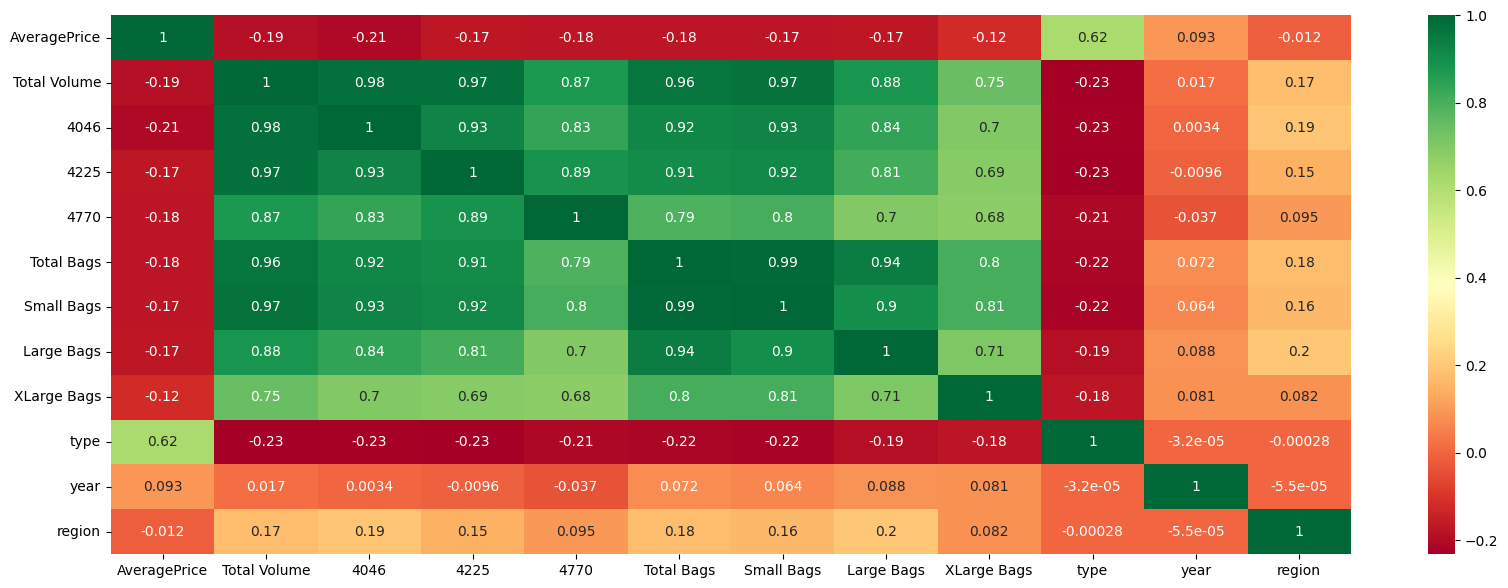

In [47]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")

##**3. Is there any multicollinearity in the model?**

Yes, there is significant multicollinearity in the model.

**The Variance Inflation Factor (VIF) values** provide evidence of this. Here's a general guideline regarding VIF values:

A VIF of 1 indicates no multicollinearity.
A VIF between 1 and 5 is generally considered acceptable.
A VIF above 5-10 suggests high multicollinearity.


Variables like **Total Volume**, **4046**, **4225**, **4770**, **Total Bags**, **Small Bags**, **Large Bags**, and **XLarge Bags** have extremely high VIF values, much beyond 10, indicating severe multicollinearity among these predictors.

**AveragePrice** and **year** also have VIF values above 10, suggesting they too have multicollinearity issues, although not as extreme as the aforementioned variables.

**type** and **region**, with VIF values of 3.34 and 4.16 respectively, are below the general threshold of 10, suggesting they might not be major contributors to multicollinearity in this dataset, but they are not entirely free from it either.

**What happens because of multicollinearity?**

1. Makes the coefficients unstable and harder to interpret.
2. Reduces the precision of the estimated coefficients, which makes them statistically insignificant even if they are theoretically significant.

**What can we do to address this issue?**

1. Remove some of the highly correlated predictors.
2. Combinie predictors.
3. Use regularization methods like Ridge or Lasso regression.


In [48]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'df' with your predictor variables
# Exclude the specific column you want to ignore
exclude_column = 'Unnamed: 0'
predictors = [col for col in df.columns if col != exclude_column]

# Create a DataFrame containing only the selected predictors
X = df[predictors]

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Format the VIF values to two decimal points
vif["VIF"] = ["{:.2f}".format(value) for value in vif["VIF"]]

# Print the VIF values
print(vif)

        Variable                 VIF
0   AveragePrice               21.93
1   Total Volume       5212424157.49
2           4046        694698638.40
3           4225        633297244.65
4           4770          4973370.24
5     Total Bags  250199979298360.88
6     Small Bags  142971416741920.50
7     Large Bags   15214863605981.41
8    XLarge Bags      78555723484.57
9           type                3.34
10          year               18.79
11        region                4.16


##**4. In the multivariate models are predictor variables independent of all the other predictor variables?**


Based on the heatmap result, the predictor variables are not independent of all the other predictor variables. Many of them have strong correlations, as indicated by the values close to 1 or -1.

Specifically:

1. Total Volume has a very strong correlation with 4046, 4225, 4770, Total Bags, and Small Bags, with correlation values close to or above 0.9.

2. 4046 also has a strong correlation with 4225, 4770, Total Bags, and Small Bags.

3. 4225 shows a strong correlation with 4770, Total Bags, and Small Bags.

4. 4770 is highly correlated with Total Bags and Small Bags.

5. Total Bags and Small Bags have a correlation value of 0.99, which is extremely high and almost perfect linear relationship.

There are also other variables showing strong correlations, but not as high as the aforementioned ones.

In conclusion, many of the predictor variables are highly correlated with each other, indicating they are not independent.

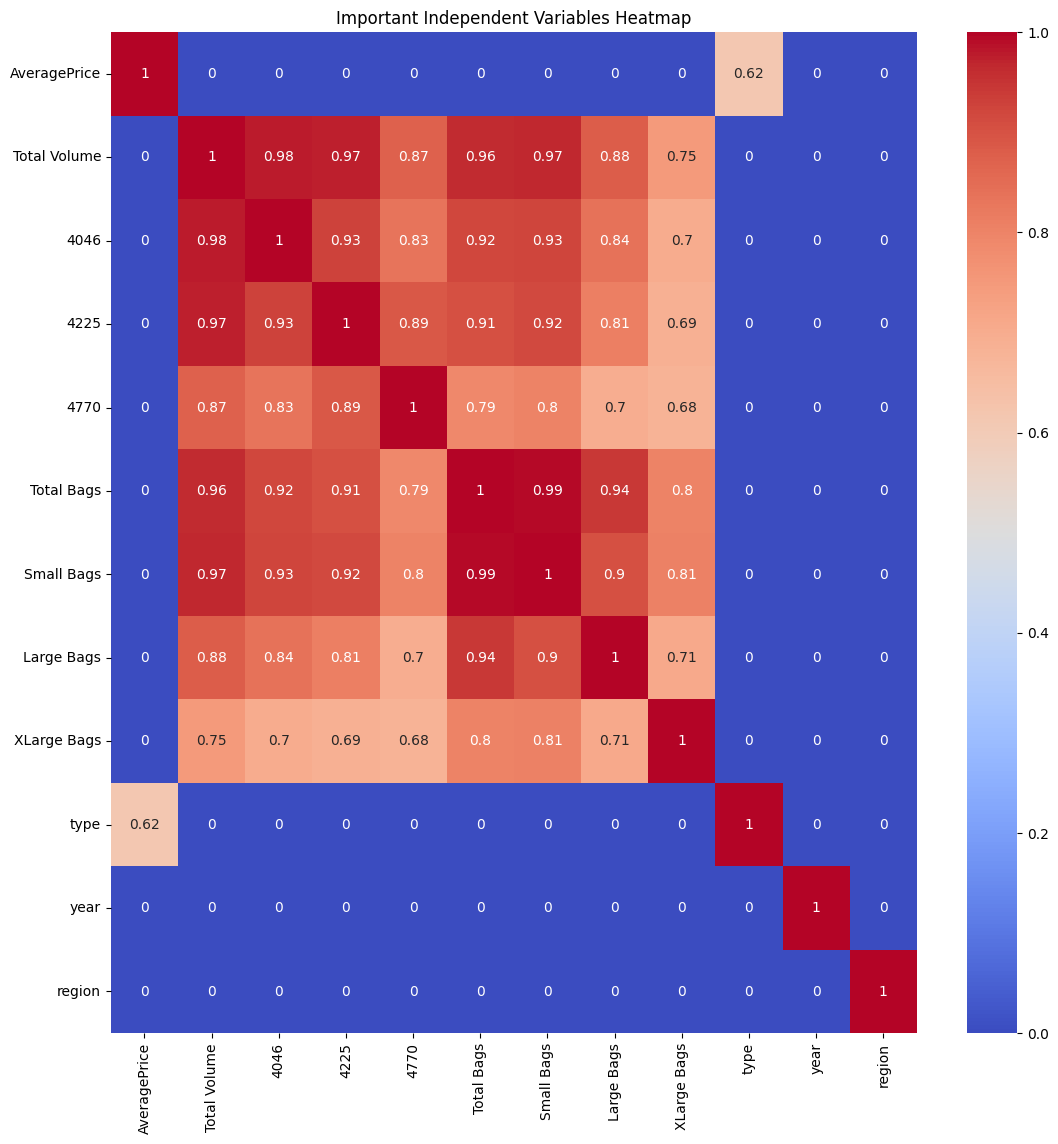

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# Setting a threshold for correlation strength
correlation_threshold = 0.5

# Filtering out the important independent variables
important_variables = correlation_matrix[abs(correlation_matrix) >= correlation_threshold].fillna(0)

# Creating a heatmap to visualize the relationships
plt.figure(figsize=(13, 13))
sns.heatmap(important_variables, annot=True, cmap='coolwarm')
plt.title('Important Independent Variables Heatmap')
plt.show()

##**5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**



"ELI5" is used for explaining linear regression in a simplified and easy-to-understand manner because linear regression is one of the fundamental concepts in statistics and machine learning.

We will use Eli5 to list the most significant predictor variables.

In [49]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=99ccec9125796ca74e340e7cace12337b724a2f8786278cab4ae58e42155dd1a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [51]:
from sklearn.model_selection import train_test_split

X = df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']]
y = df['Total Volume']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [52]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Creating linear regression object
regr = linear_model.LinearRegression()

# Training the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [53]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist(), top=7)

From the above given features, the top 4 are the most important predictor variables with the '4225' type PLU code avocados sold being the variable which has the highest impact on predicting the 'Total Volume'.

##**6. Does the model make sense?**

For a regression model to be considered effective, it's essential that it aligns with the underlying assumptions of the method used, and diagnostic metrics such as p-values and VIF fall within acceptable ranges.

The reported RMSE for the model is 154,206.50. This value should be interpreted relative to the scale of the target variable. If the range of your target variable is vast, this might not be as concerning. However, if the target variable operates on a much smaller scale, then this RMSE might indicate significant prediction errors.

Furthermore, the R^2 value is approximately 0.9983, which suggests that the model explains almost 99.83% of the variability in the target variable. While this might seem like an excellent fit at first glance, such a high R^2 can also raise concerns about overfitting, especially if this performance isn't mirrored in a separate validation dataset.

To enhance the model's predictive accuracy:

1. **Feature Selection**: Consider dropping variables that have a marginal impact on the model's predictive power. This can lead to a more interpretable and potentially more accurate model.
2. **Handling Outliers**: Address outliers by either removing them or using techniques to diminish their influence on the model.
3. **Ensemble Methods**: Utilize ensemble models, like the stacked ensemble you've used, which integrate the predictions of several base estimators to improve generalizability and robustness over a single model.

It's crucial to continuously assess the model using out-of-sample data to ensure that it generalizes well to new, unseen data and doesn't just fit the training data exceptionally well.

In [54]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 23779645670.004044
RMSE: 154206.5033323953
MAE: 26836.56168594133
RMSLE: NaN
Mean Residual Deviance: 23779645670.004044
R^2: 0.9983541681835152
Null degrees of freedom: 3574
Residual degrees of freedom: 3571
Null deviance: 5.168631091474237e+16
Residual deviance: 85012233270264.45
AIC: 95569.6530966618

##**7. Does regularization help?**

We will be finding out different trends between models before and after being regularised.

In [55]:
#genereating models with and without regularisation

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
df_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
df_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [61]:
# Generating models without regularisation

train = train.drop("XLarge Bags", axis=1)
df_glm.train(y = 'Total Volume', training_frame = train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698977058632_10


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              10                            10                             1                       py_23_sid_beaf

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2818.093145873845
RMSE: 53.085715083003684
MAE: 5.888691363693563
RMSLE: 0.0010038095168622102
Mean Residual Deviance: 2818.093145873845
R^2: 0.9999999997508328
Null degrees of freedom: 14673
Residual degrees of freedom: 14663
Null deviance: 1.659636529752867e+17
Residual deviance: 41352698.8225528
AIC: 158234.56032645612

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  -----------------  ------------------
    2023-11-03 02:26:05  0.000 sec   0             1.6596365424188333e+17     11310048673973.24
    2023-11-03 02:26:05  0.139 sec   1                                                           53.085715083003684  2818.093145873845    5.888691363693563  0.9999999997508328

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
4046          1.23637e+06            1                    0.355678
4225          1.17782e+06            0.952645             0.338835
Total Bags    957433                 0.774392             0.275435
4770          104218                 0.0842937            0.0299814
Small Bags    184.044                0.000148858          5.29457e-05
Large Bags    54.3266                4.39405e-05          1.56287e-05
type          2.51776                2.03642e-06          7.2431e-07
year          2.40096                1.94195e-06          6.9071e-07
region        0.713734               5.77283e-07          2.05327e-07
AveragePrice  0.513982               4.15719e-07          1.47862e-07

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [62]:
#genereating models with regularisation

df_glm_regularization.train(y = 'Total Volume', training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698977058632_11


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  10                            10                             1                       py_23_sid_beaf

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 37888396.80612817
RMSE: 6155.355132413415
MAE: 2146.0432225671057
RMSLE: 0.06551265033194424
Mean Residual Deviance: 37888396.80612817
R^2: 0.9999966500235156
Null degrees of freedom: 14673
Residual degrees of freedom: 14663
Null deviance: 1.659636529752867e+17
Residual deviance: 555974334733.1248
AIC: 297730.5894437564

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  ------------------
    2023-11-03 02:26:13  0.000 sec   0             1.6596365424188333e+17     11310048673973.24
    2023-11-03 02:26:13  0.039 sec   1                                                           6155.355132413415  37888396.80612817    2146.0432225671057  0.9999966500235156

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
4046          1.22879e+06            1                    0.352342
4225          1.16563e+06            0.948601             0.334232
Small Bags    435115                 0.354102             0.124765
Total Bags    405310                 0.329846             0.116219
Large Bags    138637                 0.112824             0.0397528
4770          112772                 0.0917753            0.0323363
type          582.536                0.000474075          0.000167036
AveragePrice  332.612                0.000270684          9.53732e-05
year          233.157                0.000189746          6.68556e-05
region        83.7186                6.81312e-05          2.40055e-05

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Observing the metrics:

The MSE saw a significant jump from 2,818.09 to 37,888,396.81. Concurrently, the RMSE skyrocketed from 53.09 to 6,155.36. Most other metrics also show substantial differences. Specifically, the Residual deviance swelled from 41,352,698.82 to 555,974,334,733.12, and the AIC increased from 158,234.56 to 297,730.59.

Given these changes, it's evident that the regularization has adversely affected the model's performance for this specific dataset.

##**8. Which independent variables are significant?**



We will be using an OLS summary for this question.

In [63]:
import statsmodels.api as sm
import pandas as pd

# Defining the independent variables (features)
X = df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']]
y = df['Total Volume']  # Defining the dependent variable


# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

# Get a summary of the model
summary = model.summary()

# Print the summary to see the coefficients, p-values, etc.
print(summary)



                                 OLS Regression Results                                
Dep. Variable:           Total Volume   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.642e+12
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                        0.00
Time:                        02:32:59   Log-Likelihood:                         -97014.
No. Observations:               18249   AIC:                                  1.940e+05
Df Residuals:                   18238   BIC:                                  1.941e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [64]:
# Extracting p-values for each independent variable using integer indices
p_values = model.pvalues[0:]

# Setting a significance level of 0.005 for feature selection.
# Variables with p-values less than or equal to this significance level are considered significant.
significance_level = 0.005

# Filtering out important independent variables based on p-values
important_vars = [var for var, p_value in zip(X.columns, p_values) if p_value < significance_level]

# Sorting the important variables based on their p-values in ascending order
sorted_important_vars = sorted(important_vars, key=lambda var: p_values[X.columns.get_loc(var)])

# Printing the important variables
print("Important Independent Variables:", end = "\n")
print(sorted_important_vars)

Important Independent Variables:
['4046', '4225', '4770', 'type']


From the OLS summary, we identified key independent variables based on their p-values.

Variables with p-values below 0.005 are deemed significant. The highlighted significant variables align with our prior analysis of critical variables.

##**9. Which hyperparameters are important?**



For finding the best set of hyperparameters and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used.

It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [65]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch


In [66]:
hyper_params = {
    "learn_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "sample_rate": [0.8, 0.9, 1.0],
    "col_sample_rate": [0.8, 0.9, 1.0]
}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1 }


In [68]:

gbm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=hyper_params,
    search_criteria=search_criteria,
)

gbm_grid.train(
    x=df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'type', 'year',
       'region']],
    y= 'Total Volume',
    training_frame=train, ntrees=100, seed=1
)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.8,0.1,7.0,1.0,gbm_grid2_model_19,9080270973.6213074
,0.9,0.1,7.0,0.9,gbm_grid2_model_25,10231911167.8091793
,0.8,0.1,7.0,0.8,gbm_grid2_model_35,10550703999.9412231
,1.0,0.1,7.0,0.8,gbm_grid2_model_26,10867124782.3975811
,1.0,0.1,5.0,1.0,gbm_grid2_model_6,11030384726.7038231
,0.8,0.1,5.0,0.9,gbm_grid2_model_7,11924640584.4517727
,1.0,0.1,5.0,0.9,gbm_grid2_model_15,11932382759.8452225
,0.9,0.1,5.0,0.8,gbm_grid2_model_10,12193009710.7253437
,1.0,0.05,7.0,1.0,gbm_grid2_model_13,14822295831.8606148
,0.9,0.05,7.0,0.9,gbm_grid2_model_30,15875396067.1043530


In [69]:
parameterGrid = gbm_grid.get_grid(sort_by="rmse", decreasing=False)

In [70]:
list_hyperparameters = []
for i in range(36):
    list_hyperparameters.append(parameterGrid.get_hyperparams_dict(i))

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [71]:
models = parameterGrid.models


In [72]:
list_rmse = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(train)
    rmse = performance_metrics.rmse()
    list_rmse.append(rmse)

In [73]:
for i in range(36):
    list_hyperparameters[i]["rmse"] = list_rmse[i]

In [74]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
hyperparameters_dataframe

,col_sample_rate,learn_rate,max_depth,sample_rate,rmse
0,0.8,0.10,7,1.0,9.529056e+04
1,0.9,0.10,7,0.9,1.011529e+05
2,0.8,0.10,7,0.8,1.027166e+05
3,1.0,0.10,7,0.8,1.042455e+05
4,1.0,0.10,5,1.0,1.050256e+05
5,0.8,0.10,5,0.9,1.092001e+05
6,1.0,0.10,5,0.9,1.092354e+05
7,0.9,0.10,5,0.8,1.104219e+05
8,1.0,0.05,7,1.0,1.217469e+05
9,0.9,0.05,7,0.9,1.259976e+05


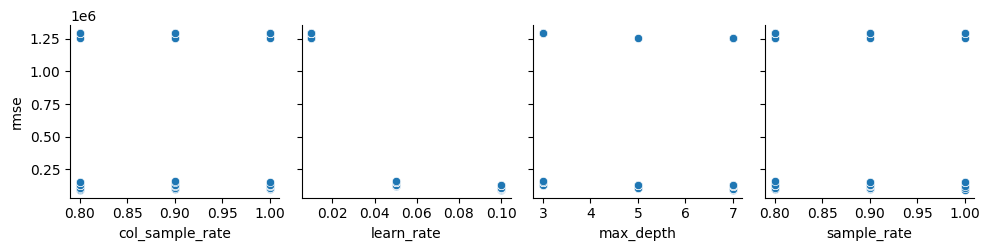

In [75]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["rmse"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

#**Questions:**

###1. Is the relationship significant?
- I have observed that the majority of the features possess p-values that are more than 0.5. Additionally, the R^2 value is 0.9983, suggesting a very strong explanatory power of the features in the model. This indicates a high degree of association between the predictors and the response variable. The data supports the idea that there's a significant relationship between the variables under consideration.

###2. Are any model assumptions violated?

- One fundamental requirement of linear regression is that the residuals should be homoscedastic, meaning they have a consistent spread across all levels of the independent variables. Analyzing the scatterplot, we can discern a pattern of heteroscedasticity where the data points are densely clustered in the center but scatter more broadly at the fringes. This variation in the spread of residuals can undermine the credibility of regression estimates.

- Another critical assumption of linear regression is the normality of residuals. A close examination of the probability plot showcases that while the data points adhere closely to the theoretical normal line on the left, there's a stark divergence on the right, especially in the upper quantiles. This deviation is indicative of a potential breach in the normality assumption.

###Key Observations:

1. Our model appears to grapple with upholding the tenets of both homoscedasticity and normality. The evident heteroscedastic trend in the scatterplot, coupled with the departure from normality observed in the probability plot, can magnify challenges, potentially yielding imprecise regression outcomes and biased statistical interpretations.

###Recommendations:

1. **Data Transformation**: Implementing transformations, like the logarithmic transformation, on the dependent variable might assist in rectifying issues of heteroscedasticity and normality deviations.
2. **Detailed Residual Scrutiny**: A more granular analysis of the residuals can shed light on the nature and potential causes of these discrepancies.
3. **Employ Weighted Regression**: Weighted regression can be an effective measure against heteroscedasticity by assigning varying weights to distinct data points.
4. **Adopt Non-Parametric Approaches**: If the data diverges significantly from a normal distribution, pivoting to non-parametric techniques that aren't hinged on the normality assumption might be beneficial.
5. **Probe for Outliers**: A rigorous assessment of the dataset for outliers, especially in regions with pronounced deviations, is essential since outliers can skew both the distribution and variance of residuals.

In conclusion, the model does seem to breach certain foundational assumptions, most notably those relating to homoscedasticity and normality.

###3. Is there any multicollinearity in the model?
- To show the multicollinearity in the model, I used the VIF method to classify variables having VIF value of more than 5 as the ones that showcase multicollinearity.
A VIF of 1 indicates no multicollinearity.
A VIF above 5-10 suggests high multicollinearity.

Variables like Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags have extremely high VIF values, much beyond 10, indicating severe multicollinearity among these predictors.

###4. In the multivariate models are predictor variables independent of all the other predictor variables?
- A heatmap was used for this analysis to show if the predictor variables are independent of all the other predictor variables.
- From the heatmap I was able to confirm that, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, and ‘Small Bags’ are correlated with the predictor variable 'Total Volume’

###5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
- I implemented the "Eli5" in order to print out the most significant and exclude the insignificant variables in the form of a list.
- '4225, '4046, ‘Total Bags’, and ‘Small Bags’ are correlated with the predictor variable ‘Total Volume’.

###6. Does the model make sense?
For a regression model to be deemed effective, it must adhere to the foundational assumptions of the technique employed, ensuring metrics such as p-values and VIF are within the recommended bounds.

The model's given RMSE stands at 154,206.50. This figure should be gauged in relation to the target variable's span. If the target's range is expansive, such an RMSE might be less alarming. Conversely, if the target variable is confined to a tighter range, this RMSE may signify substantial forecasting errors.

Additionally, the R^2 value clocks in at roughly 0.9983, indicating the model accounts for nearly 99.83% of the fluctuations in the target variable. While this may initially appear promising, an R^2 of such magnitude could also hint at overfitting, especially if a similar level of performance isn't reflected in an independent validation set.

To bolster the model's predictive prowess:

1. **Feature Refinement**: Reflect on excluding variables with minimal influence on the model's prediction capacity, potentially leading to a streamlined and more effective model.
2. **Outlier Management**: Address data anomalies either by excision or by deploying methods to mitigate their sway on the model.
3. **Ensemble Approaches**: Leverage ensemble models, akin to the stacked ensemble you've applied, amalgamating the forecasts of multiple foundational models to heighten accuracy and resilience against a singular model.

Regular evaluations using unseen data are paramount to confirm the model's applicability beyond the training dataset and to safeguard against over-optimistic fitting.

###7. Does regularization help?
- As stated above, Ridge regularisation was conducted and there was a huge change in the model after regularization. Hence, the regularisation did help with the accuracy of the model.

###8. Which independent variables are significant?
- I executed the OLS to study the p-values of the independent variables, and I applied a threshold value on the p-values reading to get a list of independent variables that had p-values less than 0.005. The variables on this list had a significant impact on the dependent variable 'Total Volume”.

###9. Which hyperparameters are important?
- As I filtered out parameters with respect to their RMSE values, col_sample_rate, learn_rate, max_depth, and sample_rate can be considered important parameters.


#**References**

- H2O documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html
- Linear Regression: https://www.ibm.com/topics/linear-regression#:~:text=Resources-,What%20is%20linear%20regression%3F,is%20called%20the%20independent%20variable.
- Github: https://github.com/makarandmadhavi/AutoML-Marketting-Campaign/blob/main/AutoML_Marketting_Campaign.ipynb, https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

- ChatGPT - https://chat.openai.com/chat

60% code is written by me with the other 40% referenced and modified from various sources such as stackoverflow geeksfor. geeks and ChatGPT



#**License**

Copyright 2023 Pritika-24

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.